# Dependency import

The **pandas** module is imported to create dataframes and other types of data strucutures, necessary for data analysis. This module is also used to perform data manipulation and operations on the desired datasets with a greater ease.

<br/>

The **numpy** module is imported to perform mathematical operations on values within datatsets or the datasets as a whole.

<br/>

The **linear_model** class, **PolynomialFeatures** class, **r2_score** function, **mean_squared_error** function, **mean_absolute_error** function, and **train_test_split**  function, are imported from the **sklearn** module to create linear machine learning models, to split the data into training and testing dataset sub-sets, and to validate the machine learning models performance by evaluating their respective error metrics.

<br/>

The **seaborn** and **matplotlib** modules are imported to perform data visualisation on the datasets.

<br/>

After the dependencies are inserted, the dataset is loaded. The dataset can be downloaded from: https://www.kaggle.com/datasets/hm-land-registry/uk-housing-prices-paid 

In [44]:

######################
# DEPENDECIES IMPORT #
######################

import numpy as np
import pandas as pd;
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt

# CHANGE THE PATH TO THE PATH WHERE THE DATASET IS DOWNLOADED
path_to_file = "./price_paid_records.csv"

# LOAD DATASET
house_prices_dataset = pd.read_csv(path_to_file)


# Optional dataset minimisation

For ease of operation purposes, the data can be minimised to facilitate a lower processing time in accordance with the boolean value **minimise_dataset**. This option was added due to the fact that the selected dataset has a large size (~ 2 GB). In order to preserve the proportions of the initial dataset within the sub-set dataset, the data within the columns that contain the prices is normalised. 

In [45]:
minimise_dataset = True
percentage = 20

if minimise_dataset is True:
    _, result= train_test_split(house_prices_dataset, test_size=percentage / 100, random_state=1)
    house_prices_dataset = result
    house_prices_dataset = house_prices_dataset.sort_values(by=['Date of Transfer'])

house_prices_dataset

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
506016,{3B756A75-99E5-4015-85E2-F4BBD91BE5FF},84000,1995-01-01 00:00,F,N,L,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,A,A
83847,{7C652BE6-947F-4AFF-BA1D-22E29C6718A4},62000,1995-01-01 00:00,S,N,F,ANDOVER,TEST VALLEY,HAMPSHIRE,A,A
260296,{CDFEF02F-BB0B-4C64-AD05-58B3DD57ED48},53250,1995-01-01 00:00,S,N,L,MANCHESTER,ROCHDALE,GREATER MANCHESTER,A,A
112233,{E56F79CE-0B40-4272-BE89-571DDB54F347},59000,1995-01-01 00:00,F,N,L,LONDON,CAMDEN,GREATER LONDON,A,A
648744,{1F6B59A3-72E9-4E4A-9EB7-E073108E5F0E},29500,1995-01-01 00:00,S,Y,L,RAYLEIGH,ROCHFORD,ESSEX,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22187683,{5376B385-3C4A-34C1-E053-6B04A8C09FF6},485500,2017-06-28 00:00,D,N,F,COLYTON,EAST DEVON,DEVON,A,A
22348601,{5376B386-0962-34C1-E053-6B04A8C09FF6},121000,2017-06-28 00:00,T,N,F,SUNDERLAND,SOUTH TYNESIDE,TYNE AND WEAR,A,A
22461166,{5376B385-B8CA-34C1-E053-6B04A8C09FF6},369950,2017-06-28 00:00,F,N,L,LONDON,CAMDEN,GREATER LONDON,A,A
22146513,{5376B385-41B4-34C1-E053-6B04A8C09FF6},160000,2017-06-28 00:00,F,N,L,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A


# Dataset cleaning

The dataset is cleaned by performing multiple operations:

* The values from the **Date of Transfer** column are transformed from DateTime values, into integer values that contain only the year of the property transfer. This is done in order to allow mathematical operations to be performed with the values within the **Date of Transfer** column.

* The columns that contain redundant values **Transaction unique identifier**, **PPDCategory Type**, **Record Status - monthly file only**, **Duration**, **District**, and **County**, are removed to further minimise the size of the dataset and also improve the visualisation of the dataset as a whole. 

In [46]:
#################
# DATA CLEANING #
#################

# DROP ROWS WITH NULL VALUES
house_prices_dataset.dropna()

# CONVERT THE DATE WHEN THE PROPRIETIES WERE SOLD TO JUST YEARS 
house_prices_dataset["Date of Transfer"] = pd.to_datetime(house_prices_dataset['Date of Transfer']).dt.strftime('%Y').astype(int)

# REMOVE REDUNDANT COLUMNS
house_prices_dataset.drop(["Transaction unique identifier", "PPDCategory Type", "Record Status - monthly file only", "Duration", "District", "County", "Old/New", "Property Type", "Town/City"], axis=1, inplace=True)

house_prices_dataset

,Price,Date of Transfer
506016,84000,1995
83847,62000,1995
260296,53250,1995
112233,59000,1995
648744,29500,1995
...,...,...
22187683,485500,2017
22348601,121000,2017
22461166,369950,2017
22146513,160000,2017


# Data visualisation

The layout of the plotting grid is restructured to have to enable the data to be visualised in multiple graphs, in multiple formats in the exact same page. 3 data associations are created and visualised using multiple types of plots, to analyse the factors such as the property type, year, and if the building is old or new, against the price: 


## Time against price association

To analyse if the price of the properties increases linearly as the period of time increases, the time period was plotted against the price using a **lineplot** and a **barplot**. The lineplot was used to plot the data and visualise the result by also displaying the error margin of the data. The **barplot** was used to plot the data using candlesticks to generate a strongly displayed visualisation of the relationship by obscuring the other factors, besides the relationship itself. The reslut of the data visualisation is showing the fact that the price of the properties increases linearly, in relation with the time period.

In [47]:
###########################################
# DATA VISUALISATION (Time against price) #
###########################################

visualise = True

if visualise is True:
    fig, ax = plt.subplots(figsize=(50, 50), layout='constrained', ncols=2)
    sb.lineplot(data=house_prices_dataset, y='Price', x='Date of Transfer', ax=ax[0])
    sb.barplot(data=house_prices_dataset, y='Price', x='Date of Transfer', ax=ax[1])

c:\Users\teodo\.conda\envs\machine-learning-assignment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\teodo\.conda\envs\machine-learning-assignment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


# Data cleaning

The data is normalised to remove the bias caused by the diference in size of the values within the dataset

In [ ]:
#################
# DATA CLEANING #
#################

# DATA NORMALISATION

for column in house_prices_dataset.columns:
    house_prices_dataset[column] = house_prices_dataset[column] / house_prices_dataset[column].abs().max()

# Training data

The data is split 80% for training and 20% for testing. This is done to prevent model overfitting.

In [ ]:
################
# TRANING DATA #
################

train_X_linear, test_X_linear, train_Y_linear, test_Y_linear = train_test_split(house_prices_dataset[["Price"]], house_prices_dataset[["Date of Transfer"]], train_size=0.8, test_size=0.2)

train_X_linear = np.asanyarray(train_X_linear)
train_Y_linear = np.asanyarray(train_Y_linear)

# Simple linear regression

The training data is fitted to the model and a predicition based on the testing data is generated

In [ ]:
############################
# SIMPLE LINEAR REGRESSION #
############################

regr = linear_model.LinearRegression()
regr.fit(X=train_X_linear, y=train_Y_linear)
y_ = regr.predict(X=test_X_linear)

c:\Users\teodo\.conda\envs\machine-learning-assignment\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Testing the accuracy

The accuracy if the model is tested

In [ ]:
########################
# TESTING THE ACCURACY #
########################

mean_squared_error_res = mean_squared_error(y_pred=y_, y_true=test_Y_linear)
mean_absolute_error_res = mean_absolute_error(y_pred=y_, y_true=test_Y_linear)
r2_score_res = r2_score(y_pred=y_, y_true=test_Y_linear)

print("r2: " + str(r2_score_res))
print("mean_absolute_error: " + str(mean_absolute_error_res))
print("mean_squared_error: " + str(mean_squared_error_res))

r2: 0.032734714696711076
mean_absolute_error: 0.0025706236595712307
mean_squared_error: 9.48496982604783e-06


# Polynominal regression

A loop from 0 to 100 is initiated. This loop is creating a polynominal regression model at each loop iteration, fitting the model, and testing the accuracy of the model. The degree of the regression model is the current index of the loop. When the loop reaches its limit, or when any of the algorithms used to test the accuracy of the model yields a result that is worst than the previous iteration, the loop will stop, otherwise it will continue and it will save the model's coreficient and intercept.

In [ ]:
##########################
# POLYNOMINAL REGRESSION #
##########################

mean_squared_error_res_poly = 10
mean_absolute_error_res_poly = 10
r2_score_res_poly = 0

coef = 0
intercept = 0

for i in range(1, 100):
    poly_regr = PolynomialFeatures(degree=i)
    train_X_i = poly_regr.fit_transform(X=train_X_linear)

    poly_regr_ = linear_model.LinearRegression()
    poly_regr_.fit(X=train_X_i, y=train_Y_linear)

    test_X_i = poly_regr.fit_transform(X=test_X_linear)
    y_i = poly_regr_.predict(X=test_X_i)

    mean_squared_error_res_poly_n = mean_squared_error(y_pred=y_i, y_true=test_Y_linear)
    mean_absolute_error_res_poly_n = mean_absolute_error(y_pred=y_i, y_true=test_Y_linear)
    r2_score_res_poly_n = r2_score(y_pred=y_i, y_true=test_Y_linear)

    interupt = False

    if mean_squared_error_res_poly_n > mean_squared_error_res_poly:
        interupt = True
    elif mean_absolute_error_res_poly_n > mean_absolute_error_res_poly:
        interupt = True
    elif r2_score_res_poly_n < r2_score_res_poly:
        interupt = True
    
    if interupt is True:
        break
    else:
        coef = poly_regr_.coef_
        intercept = poly_regr_.intercept_

        mean_squared_error_res_poly = mean_squared_error_res_poly_n
        mean_absolute_error_res_poly = mean_absolute_error_res_poly_n
        r2_score_res_poly = r2_score_res_poly_n

print("r2: " + str(r2_score_res_poly))
print("mean_absolute_error: " + str(mean_absolute_error_res_poly))
print("mean_squared_error: " + str(mean_squared_error_res_poly))

r2: 0.26261477350589824
mean_absolute_error: 0.0021774429282250484
mean_squared_error: 7.2307739456161564e-06


# Random forest

The training data is fitted to the model and a predicition based on the testing data is generated

In [ ]:
#################
# RANDOM FOREST #
#################

regr_forest = RandomForestRegressor(max_depth=2, random_state=0)
regr_forest.fit(train_X_linear, train_Y_linear)
y_ = regr_forest.predict(X=test_X_linear)

c:\Users\teodo\.conda\envs\machine-learning-assignment\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\teodo\.conda\envs\machine-learning-assignment\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Testing the accuracy

The accuracy if the model is tested

In [ ]:
########################
# TESTING THE ACCURACY #
########################

mean_squared_error_res_forest = mean_squared_error(y_pred=y_, y_true=test_Y_linear)
mean_absolute_error_res_forest = mean_absolute_error(y_pred=y_, y_true=test_Y_linear)
r2_score_res_forest = r2_score(y_pred=y_, y_true=test_Y_linear)

print("r2: " + str(r2_score_res_forest))
print("mean_absolute_error: " + str(mean_absolute_error_res_forest))
print("mean_squared_error: " + str(mean_squared_error_res_forest))

r2: 0.29734801345334694
mean_absolute_error: 0.0021336618596659975
mean_squared_error: 6.890180999846236e-06


# Visualising the overall performance of the models

A dataset for the resulting values, regarding the accuracy of the models is compiled and the results are visualised. The result is showcasing that the best performing model is the **Random forest classifier model**, the second best performing model is the **Polynominal regresssion model**, and the worst performming model is the **Simple linear regression** model.

,models,r2,mean_absolute_error,mean_squared_error
0,Simple linear regression,0.032735,0.002571,0.000009
1,Polynominal regression,0.262615,0.002177,0.002177
2,Random forest classifier,0.297348,0.002134,0.002134


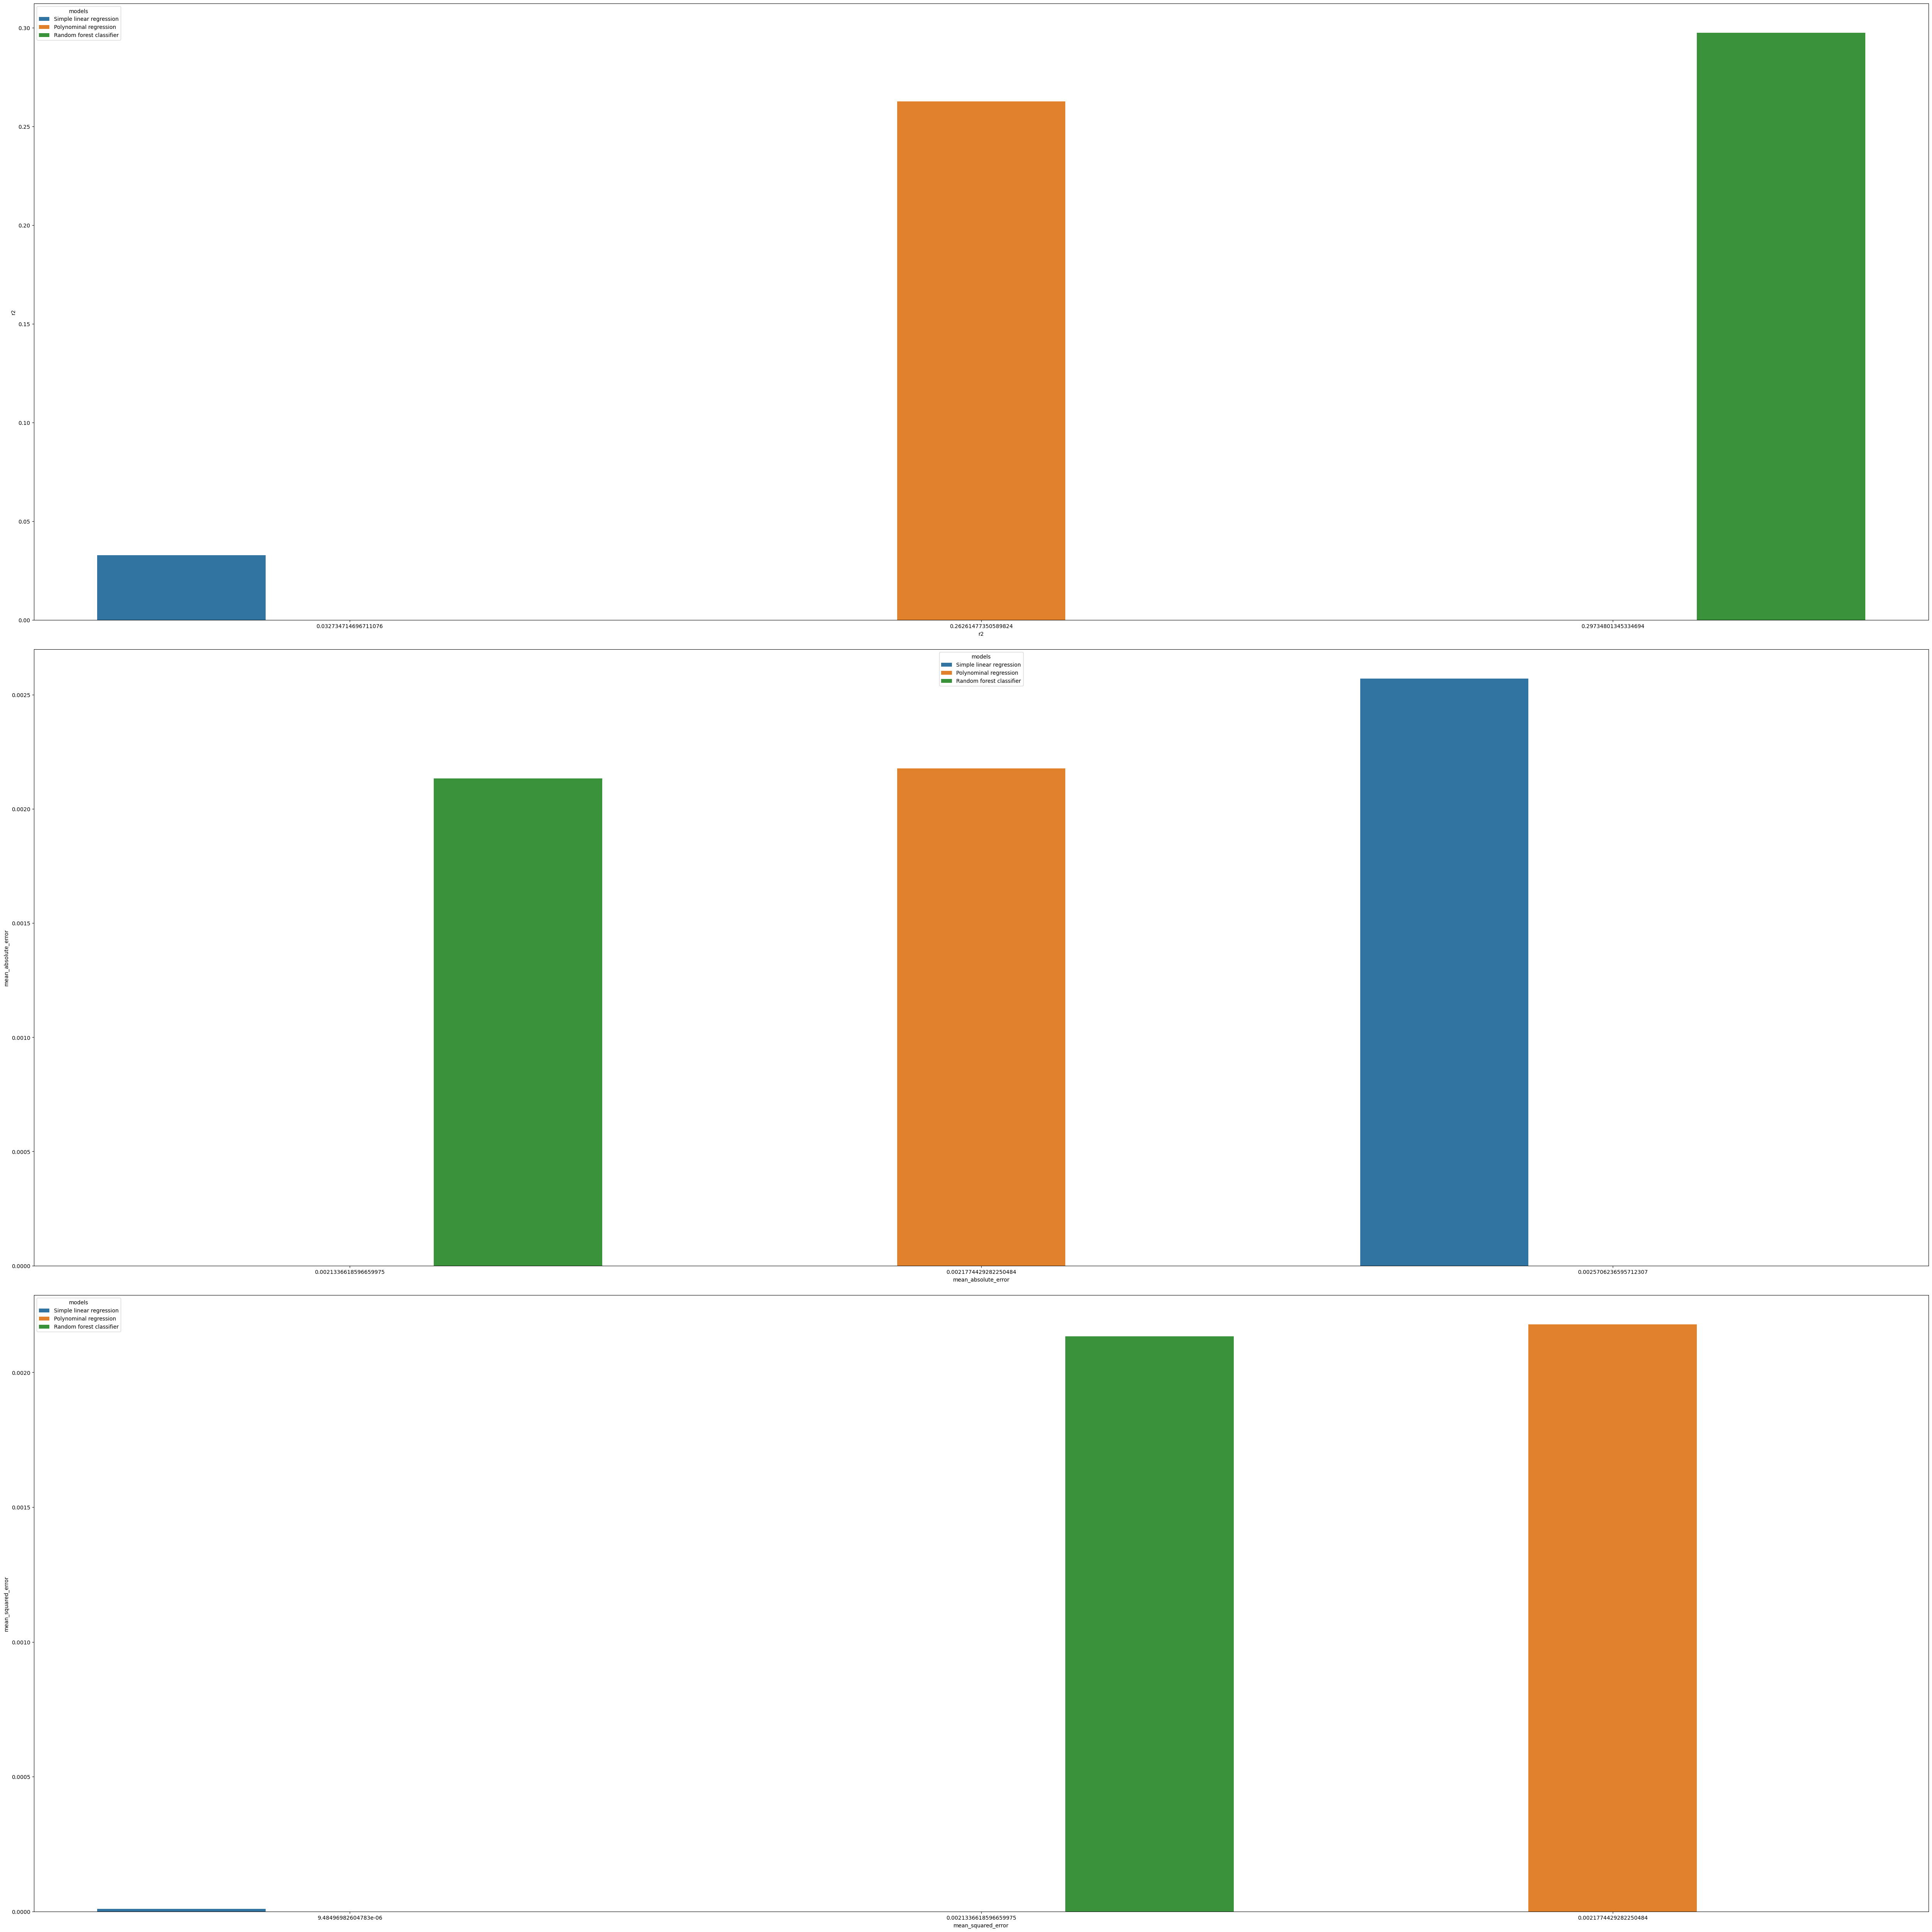

In [ ]:

metrics_data = {"models":["Simple linear regression", "Polynominal regression", "Random forest classifier"], 
                "r2":[r2_score_res, r2_score_res_poly, r2_score_res_forest], 
                "mean_absolute_error":[mean_absolute_error_res, mean_absolute_error_res_poly, mean_absolute_error_res_forest], 
                "mean_squared_error":[mean_squared_error_res, mean_absolute_error_res_poly, mean_absolute_error_res_forest]}
metrics_dataset = pd.DataFrame(metrics_data)


fig, ax = plt.subplots(figsize=(50, 50), layout='constrained', nrows=3)
sb.barplot(data=metrics_dataset, y='r2', x='r2', hue="models", ax=ax[0])
sb.barplot(data=metrics_dataset, y='mean_absolute_error',x='mean_absolute_error', hue="models", ax=ax[1])
sb.barplot(data=metrics_dataset, y='mean_squared_error',x='mean_squared_error', hue="models", ax=ax[2])

metrics_dataset